## OpenCV

In [1]:
# Ok, we're just about at the project for this course. If you reflect on the specialization 
# as a whole you'll realize that you started with probably little or no understanding of python,
# progressed through the basic control structures and libraries included with the language
# with the help of a digital textbook, moved on to more high level representations of data
# and functions with objects, and now started to explore third party libraries that exist for
# python which allow you to manipulate and display images. This is quite an achievement!
#
# You have also no doubt found that as you have progressed the demands on you to engage in self-
# discovery have also increased. Where the first assignments were maybe straight forward, the
# ones in this week require you to struggle a bit more with planning and debugging code as
# you develop.
#
# But, you've persisted, and I'd like to share with you just one more set of features before
# we head over to a project. The OpenCV library contains mechanisms to do face detection on
# images. The technique used is based on Haar cascades, which is a machine learning approach.
# Now, we're not going to go into the machine learning bits, we have another specialization on
# Applied Data Science with Python which you can take after this if you're interested in that topic.
# But here we'll treat OpenCV like a black box.
#
# OpenCV comes with trained models for detecting faces, eyes, and smiles which we'll be using.
# You can train models for detecting other things - like hot dogs or flutes - and if you're
# interested in that I'd recommend you check out the Open CV docs on how to train a cascade
# classifier: https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html
# However, in this lecture we just want to use the current classifiers and see if we can detect
# portions of an image which are interesting.
#
# First step is to load opencv and the XML-based classifiers
import cv2 as cv
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('readonly/haarcascade_eye.xml')

In [2]:
# Ok, with the classifiers loaded, we now want to try and detect a face. Lets pull in the
# picture we played with last time
img = cv.imread('readonly/floyd.jpg')
# And we'll convert it to grayscale using the cvtColor image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# The next step is to use the face_cascade classifier. I'll let you go explore the docs if you
# would like to, but the norm is to use the detectMultiScale() function. This function returns
# a list of objects as rectangles. The first parameter is an ndarray of the image.
faces = face_cascade.detectMultiScale(gray)
# And lets just print those faces out to the screen
faces

array([[158,  75, 176, 176]], dtype=int32)

In [3]:
faces.tolist()[0]

[158, 75, 176, 176]

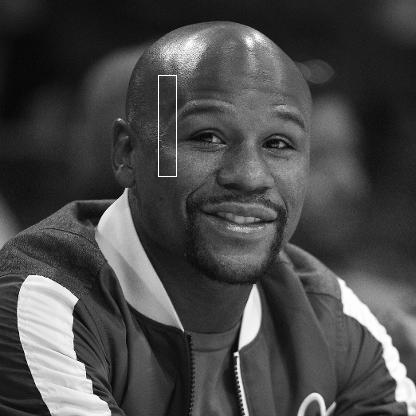

In [4]:
# The resulting rectangles are in the format of (x,y,w,h) where x and y denote the upper
# left hand point for the image and the width and height represent the bounding box. We know
# how to handle this in PIL
from PIL import Image

# Lets create a PIL image object
pil_img=Image.fromarray(gray,mode="L")

# Now lets bring in our drawing object
from PIL import ImageDraw
# And lets create our drawing context
drawing=ImageDraw.Draw(pil_img)

# Now lets pull the rectangle out of the faces object
rec=faces.tolist()[0]

# Now we just draw a rectangle around the bounds
drawing.rectangle(rec, outline="white")

# And display
display(pil_img)

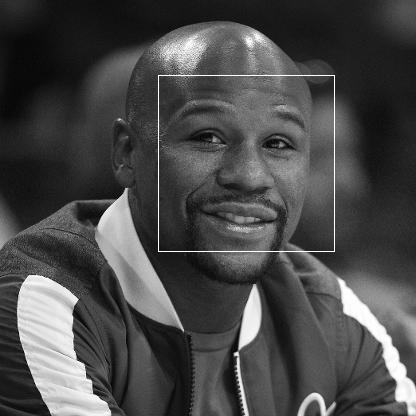

In [5]:
# So, not quite what we were looking for. What do you think went wrong?
# Well, a quick double check of the docs and it is apparent that OpenCV is return the coordinates
# as (x,y,w,h), while PIL.ImageDraw is looking for (x1,y1,x2,y2). Looks like an easy fix
# Wipe our old image
pil_img=Image.fromarray(gray,mode="L")
# Setup our drawing context
drawing=ImageDraw.Draw(pil_img)
# And draw the new box
drawing.rectangle((rec[0],rec[1],rec[0]+rec[2],rec[1]+rec[3]), outline="white")
# And display
display(pil_img)

In [6]:
# We see the face detection works pretty good on this image! Note that it's apparent that this is
# not head detection, but that the haarcascades file we used is looking for eyes and a mouth.
# Lets try this on something a bit more complex, lets read in our MSI recruitment image
img = cv.imread('readonly/msi_recruitment.gif')
# And lets take a look at that image
display(Image.fromarray(img))

AttributeError: 'NoneType' object has no attribute '__array_interface__'

In [8]:
# Whoa, what's that error about? It looks like there is an error on a line deep within the PIL
# Image.py file, and it is trying to call an internal private member called __array_interface__
# on the img object, but this object is None
#
# It turns out that the root of this error is that OpenCV can't work with Gif images. This is
# kind of a pain and unfortunate. But we know how to fix that right? One was is that we could
# just open this in PIL and then save it as a png, then open that in open cv.
#
# Lets use PIL to open our image
pil_img=Image.open('readonly/msi_recruitment.gif')
# now lets convert it to greyscale for opencv, and get the bytestream
open_cv_version=pil_img.convert("L")
# now lets just write that to a file
open_cv_version.save("msi_recruitment.png")

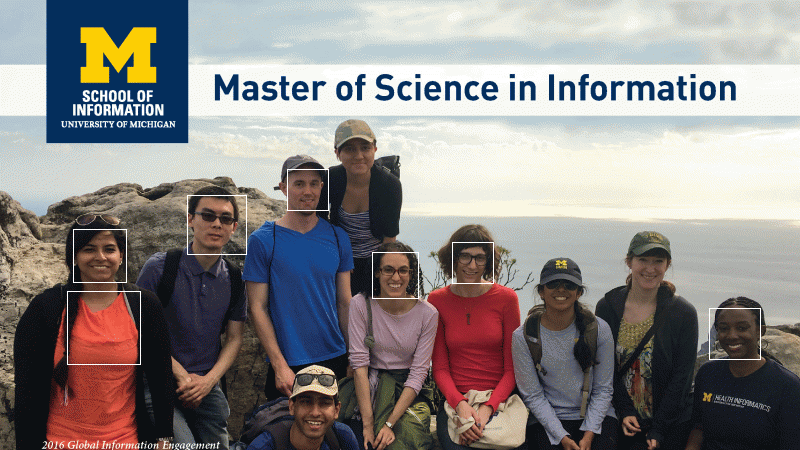

In [9]:
# Ok, now that the conversion of format is done, lets try reading this back into opencv
cv_img=cv.imread('msi_recruitment.png')
# We don't need to color convert this, because we saved it as grayscale
# lets try and detect faces in that image
faces = face_cascade.detectMultiScale(cv_img)

# Now, we still have our PIL color version in a gif
pil_img=Image.open('readonly/msi_recruitment.gif')
# Set our drawing context
drawing=ImageDraw.Draw(pil_img)

# For each item in faces, lets surround it with a red box
for x,y,w,h in faces:
    # That might be new syntax for you! Recall that faces is a list of rectangles in (x,y,w,h)
    # format, that is, a list of lists. Instead of having to do an iteration and then manually
    # pull out each item, we can use tuple unpacking to pull out individual items in the sublist
    # directly to variables. A really nice python feature
    #
    # Now we just need to draw our box
    drawing.rectangle((x,y,x+w,y+h), outline="white")
display(pil_img)

In [10]:
# What happened here!? We see that we have detected faces, and that we have drawn boxes
# around those faces on the image, but that the colors have gone all weird! This, it turns
# out, has to do with color limitations for gif images. In short, a gif image has a very
# limited number of colors. This is called a color pallette after the pallette artists
# use to mix paints. For gifs the pallette can only be 256 colors -- but they can be *any*
# 256 colors. When a new color is introduced, is has to take the space of an old color.
# In this case, PIL adds white to the pallette but doesn't know which color to replace and
# thus messes up the image.
#
# Who knew there was so much to learn about image formats? We can see what mode the image
# is in with the .mode attribute
pil_img.mode

'P'

In [11]:
# We can see a list of modes in the PILLOW documentation, and they correspond with the
# color spaces we have been using. For the moment though, lets change back to RGB, which
# represents color as a three byte tuple instead of in a pallette.
# Lets read in the image
pil_img=Image.open('readonly/msi_recruitment.gif')
# Lets convert it to RGB mode
pil_img = pil_img.convert("RGB")
# And lets print out the mode
pil_img.mode

'RGB'

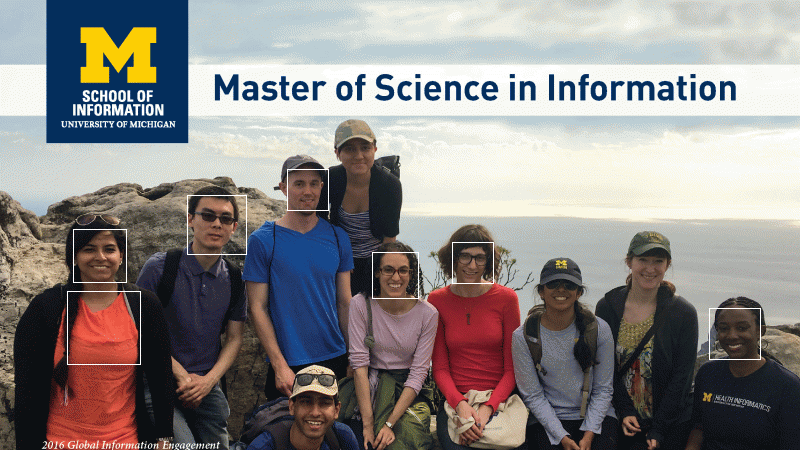

In [12]:
# Ok, now lets go back to drawing rectangles. Lets get our drawing object
drawing=ImageDraw.Draw(pil_img)
# And iterate through the faces sequence, tuple unpacking as we go
for x,y,w,h in faces:
    # And remember this is width and height so we have to add those appropriately.
    drawing.rectangle((x,y,x+w,y+h), outline="white")
display(pil_img)

In [ ]:
# Awesome! We managed to detect a bunch of faces in that image. Looks like we have missed 
# four faces. In the machine learning world we would call these false negatives - something
# which the machine thought was not a face (so a negative), but that it was incorrect on.
# Consequently, we would call the actual faces that were detected as true positives -
# something that the machine thought was a face and it was correct on. This leaves us with
# false positives - something the machine thought was a face but it wasn't. We see there are
# two of these in the image, picking up shadow patterns or textures in shirts and matching
# them with the haarcascades. Finally, we have true negatives, or the set of all possible
# rectangles the machine learning classifier could consider where it correctly indicated that
# the result was not a face. In this case there are many many true negatives.

In [ ]:
# There are a few ways we could try and improve this, and really, it requires a lot of 
# experimentation to find good values for a given image. First, lets create a function
# which will plot rectanges for us over the image
def show_rects(faces):
    #Lets read in our gif and convert it
    pil_img=Image.open('readonly/msi_recruitment.gif').convert("RGB")
    # Set our drawing context
    drawing=ImageDraw.Draw(pil_img)
    # And plot all of the rectangles in faces
    for x,y,w,h in faces:
        drawing.rectangle((x,y,x+w,y+h), outline="white")
    #Finally lets display this
    display(pil_img)

In [ ]:
# Ok, first up, we could try and binarize this image. It turns out that opencv has a built in
# binarization function called threshold(). You simply pass in the image, the midpoint, and
# the maximum value, as well as a flag which indicates whether the threshold should be
# binary or something else. Lets try this.
cv_img_bin=cv.threshold(cv_img,120,255,cv.THRESH_BINARY)[1] # returns a list, we want the second value
# Now do the actual face detection
faces = face_cascade.detectMultiScale(cv_img_bin)
# Now lets see the results
show_rects(faces)

In [ ]:
# That's kind of interesting. Not better, but we do see that there is one false positive
# towards the bottom, where the classifier detected the sunglasses as eyes and the dark shadow
# line below as a mouth.
#
# If you're following in the notebook with this video, why don't you pause things and try a
# few different parameters for the thresholding value?

In [ ]:
# The detectMultiScale() function from OpenCV also has a couple of parameters. The first of
# these is the scale factor. The scale factor changes the size of rectangles which are
# considered against the model, that is, the haarcascades XML file. You can think of it as if
# it were changing the size of the rectangles which are on the screen.
#
# Lets experiment with the scale factor. Usually it's a small value, lets try 1.05
faces = face_cascade.detectMultiScale(cv_img,1.05)
# Show those results
show_rects(faces)
# Now lets also try 1.15
faces = face_cascade.detectMultiScale(cv_img,1.15)
# Show those results
show_rects(faces)
# Finally lets also try 1.25
faces = face_cascade.detectMultiScale(cv_img,1.25)
# Show those results
show_rects(faces)

In [ ]:
# We can see that as we change the scale factor we change the number of true and 
# false positives and negatives. With the scale set to 1.05, we have 7 true positives,
# which are correctly identified faces, and 3 false negatives, which are faces which
# are there but not detected, and 3 false positives, where are non-faces which
# opencv thinks are faces. When we change this to 1.15 we lose the false positives but
# also lose one of the true positives, the person to the right wearing a hat. And
# when we change this to 1.25 we lost more true positives as well.
#
# This is actually a really interesting phenomena in machine learning and artificial
# intelligence. There is a trade off between not only how accurate a model is, but how
# the inaccuracy actually happens. Which of these three models do you think is best?

In [ ]:
# Well, the answer to that question is really, "it depends". It depends why you are trying
# to detect faces, and what you are going to do with them. If you think these issues
# are interesting, you might want to check out the Applied Data Science with Python
# specialization Michigan offers on Coursera.
#
# Ok, beyond an opportunity to advertise, did you notice anything else that happened when
# we changed the scale factor? It's subtle, but the speed at which the processing ran
# took longer at smaller scale factors. This is because more subimages are being considered
# for these scales. This could also affect which method we might use.
#
# Jupyter has nice support for timing commands. You might have seen this before, a line
# that starts with a percentage sign in jupyter is called a "magic function". This isn't
# normal python - it's actually a shorthand way of writing a function which Jupyter
# has predefined. It looks a lot like the decorators we talked about in a previous
# lecture, but the magic functions were around long before decorators were part of the
# python language. One of the built-in magic functions in juptyer is called timeit, and this
# repeats a piece of python ten times (by default) and tells you the average speed it
# took to complete.
#
# Lets time the speed of detectmultiscale when using a scale of 1.05
%timeit face_cascade.detectMultiScale(cv_img,1.05)

In [ ]:
# Ok, now lets compare that to the speed at scale = 1.15
%timeit face_cascade.detectMultiScale(cv_img,1.15)

In [ ]:
# You can see that this is a dramatic difference, roughly two and a half times slower
# when using the smaller scale!
#
# This wraps up our discussion of detecting faces in opencv. You'll see that, like OCR, this
# is not a foolproof process. But we can build on the work others have done in machine learning
# and leverage powerful libraries to bring us closer to building a turn key python-based
# solution. Remember that the detection mechanism isn't specific to faces, that's just the
# haarcascades training data we used. On the web you'll be able to find other training data
# to detect other objects, including eyes, animals, and so forth.